In [215]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [216]:
PROGRAMS = ['getpixel', 'bitblt', 'getdbits', 'windup']
FRAMEWORKS = ['SDL2_openGL']

In [ ]:
PATH = './data/final_60hz'
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [ ]:
program_data_files = []
app_data_files = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    if 'program' in file:
        program_data_files.append(data_in)
    else:
        app_data_files.append(data_in)
    
data_prorgam = pd.concat(program_data_files)
data_app = pd.concat(app_data_files)

In [217]:
# path_dict_app = {}
# path_dict_program = {}

# for framework in FRAMEWORKS:
#     for program in PROGRAMS:
#         path_dict_app[f'{framework}_{program}'] = f'data/test_2506_{framework}_{program}_app.csv'
#         path_dict_program[f'{framework}_{program}'] = f'data/test_2506_{framework}_{program}_program.csv'

In [218]:
def read_data(program, framework):
    data_in_program = pd.read_csv(path_dict_program[f'{framework}_{program}'])
    data_in_app = pd.read_csv(path_dict_app[f'{framework}_{program}'])
    data_in_program['timestamp'] = data_in_program['timestamp'] / 1000
    data_in_app['timestamp'] = data_in_app['timestamp'] / 1000
    return data_in_app, data_in_program

In [219]:
def preprocess_data(data_in_app, data_in_program):
    data_in_program['color_value'] = -1

    # increment_counter = 0
    # for index_app, row_app in data_in_app.iterrows():
    #     if row_app['event_type'] == 'render_stop':
    #         for index_program, row_program in data_in_program.iterrows():
    #             if row_program['timestamp'] > row_app['timestamp']:
    #                 data_in_program.at[index_program, 'color_value'] += 1

    for i in range (0, 10):
        timestamp_color_i = data_in_app[(data_in_app['color_value'] == i) & (data_in_app['event_type'] != 'render_stop')]['timestamp']
        print(timestamp_color_i)
        data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])
    

    # get relative time from start
    start_time = data_in_app[data_in_app['event_type'] == 'start']['timestamp'][0]
    data_in_app['time_since_start'] = data_in_app['timestamp'] - start_time
    data_in_program['time_since_start'] = data_in_program['timestamp'] - start_time

    return data_in_app, data_in_program

In [220]:
data_dict = {}

for framework in FRAMEWORKS:
    for program in PROGRAMS:
        data_in_app, data_in_program = read_data(program, framework)
        data_in_app, data_in_program = preprocess_data(data_in_app, data_in_program)
        data_in_program['program'] = program
        data_in_program['framework'] = framework
        data_dict[f'{program}_{framework}'] = (data_in_app, data_in_program)


1    1063470.47
Name: timestamp, dtype: float64
3    1063520.445
Name: timestamp, dtype: float64
5    1063570.445
Name: timestamp, dtype: float64
7    1063620.445
Name: timestamp, dtype: float64
9    1063670.445
Name: timestamp, dtype: float64
11    1063720.445
Name: timestamp, dtype: float64
13    1063770.445
Name: timestamp, dtype: float64
15    1063820.445
Name: timestamp, dtype: float64
17    1063870.445
Name: timestamp, dtype: float64
19    1063920.445
Name: timestamp, dtype: float64
1    1074558.096
Name: timestamp, dtype: float64
3    1074608.003
Name: timestamp, dtype: float64
5    1074658.003
Name: timestamp, dtype: float64
7    1074708.003
Name: timestamp, dtype: float64
9    1074758.003
Name: timestamp, dtype: float64
11    1074808.003
Name: timestamp, dtype: float64
13    1074858.003
Name: timestamp, dtype: float64
15    1074908.003
Name: timestamp, dtype: float64
17    1074958.003
Name: timestamp, dtype: float64
19    1075008.003
Name: timestamp, dtype: float64
1    108567

C:\Users\tina\AppData\Local\Temp\ipykernel_19956\3497253711.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])
C:\Users\tina\AppData\Local\Temp\ipykernel_19956\3497253711.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])
C:\Users\tina\AppData\Local\Temp\ipykernel_19956\3497253711.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i),

In [221]:
data_program = pd.DataFrame()

data_list = []
for key, value in data_dict.items():
    data_list.append(value[1])

data_program = pd.concat(data_list)
# data_program['condition'] = data_program[['program', 'framework']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

data_program

,event_type,timestamp,color_equal,color_value,time_since_start,program,framework
0,got color at,1060440.721,1,-1,-3029.724,getpixel,SDL2_openGL
1,got color at,1060456.960,1,-1,-3013.485,getpixel,SDL2_openGL
2,got color at,1060473.456,1,-1,-2996.989,getpixel,SDL2_openGL
3,got color at,1060490.071,1,-1,-2980.374,getpixel,SDL2_openGL
4,got color at,1060506.735,1,-1,-2963.710,getpixel,SDL2_openGL
...,...,...,...,...,...,...,...
5372,got color at,1097496.866,1,8,728.779,windup,SDL2_openGL
5373,got color at,1097496.875,1,8,728.788,windup,SDL2_openGL
5374,got color at,1097496.884,1,8,728.797,windup,SDL2_openGL
5375,got color at,1097496.892,1,8,728.805,windup,SDL2_openGL


In [222]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI = '#ebb300'
COLOR_OCKER = '#EC7F00'

COLOR_NONE = '#8E8E8D'
COLOR_NONE_DARK = '#4E4E4D'

todo: anpassen: on click einmal kurz weiß, dann wieder schwarz. das ist dann der startpunkt -> sollte windup helfen
hab ich eigentlich gemacht, immer noch komisch

getdbits hier jetzt glück: guten zeitpunkt im circle erraten

- bei ner zweiten messung, sieht das ggf schon ganz ander aus
- DESKDUP womöglich immer so weil ja wartet auf änderung und nicht kontinuierlich abfragt
- gdi readers: "großer" unterschied zwischen best und worst case, DESDUP verlässlicher averange case
- random zeitintervalle wichtig beim messen, sonst genau dieser effekt

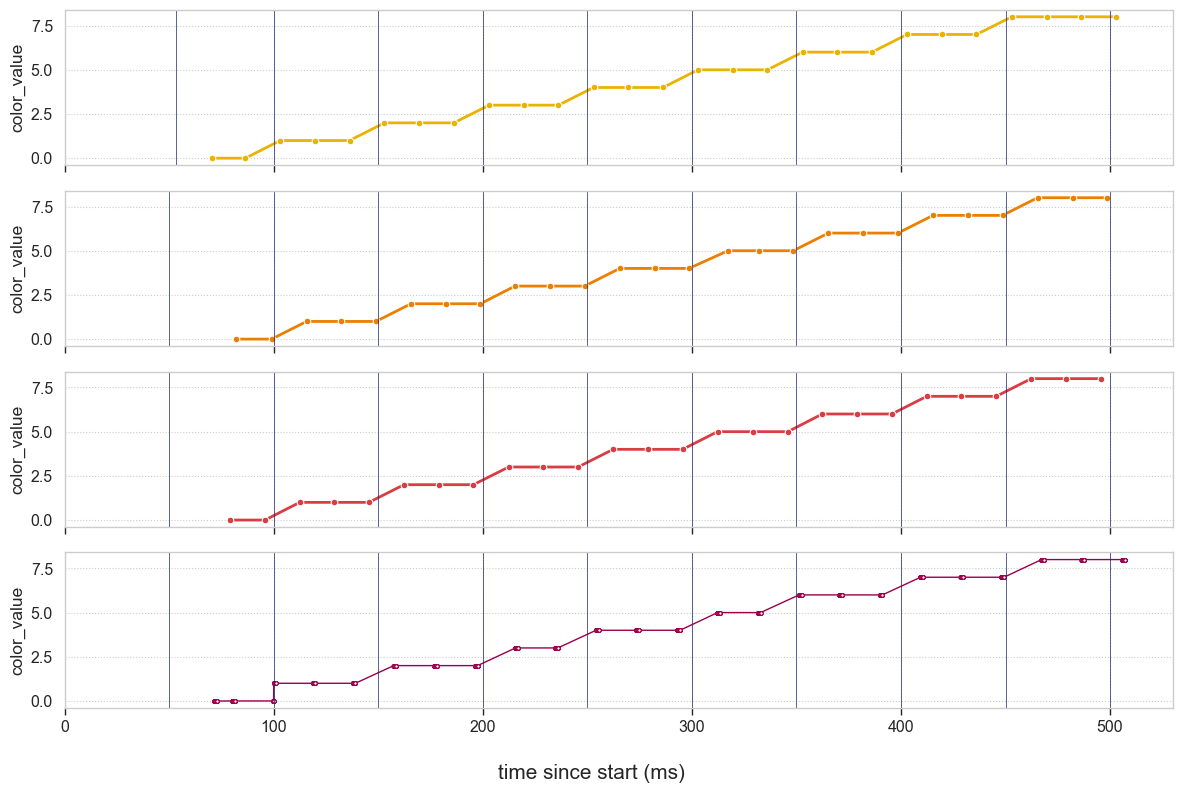

In [223]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(10, 10), "xtick.bottom": True, "grid.linestyle": ":"})
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True, sharey=True)

data_temp = data_program[data_program['time_since_start'] < 510]
data_temp = data_temp[data_temp['framework'] == 'SDL2_openGL']


# for i in range(9):
#     if i % 2 == 0:
#         axes[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axes[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axes[2].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axes[3].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axes[0].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)
# axes[1].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)
# axes[2].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)
# axes[3].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)


# getpixel
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
plot = sns.lineplot(ax=axes[0], data=data_getpixel[data_getpixel['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_OCKER_ANDI, linewidth=2)

data_app_getpixel = data_dict['getpixel_SDL2_openGL'][0]
data_app_getpixel = data_app_getpixel[data_app_getpixel['color_value'] > 0]

# for value in data_app_getpixel[data_app_getpixel['event_type'] == 'render_start']['time_since_start']:
#     axes[0].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getpixel[data_app_getpixel['event_type'] == 'render_stop']['time_since_start']:
    axes[0].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# bitblt
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
plot = sns.lineplot(ax=axes[1], data=data_bitblt[data_bitblt['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_OCKER, linewidth=2)

data_app_bitblt = data_dict['bitblt_SDL2_openGL'][0]
data_app_bitblt = data_app_bitblt[data_app_bitblt['color_value'] > 0]

# for value in data_app_bitblt[data_app_bitblt['event_type'] == 'render_start']['time_since_start']:
#     axes[1].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_bitblt[data_app_bitblt['event_type'] == 'render_stop']['time_since_start']:
    axes[1].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# getdbits
data_getdbits = data_temp[data_temp['program'] == 'getdbits']
plot = sns.lineplot(ax=axes[2], data=data_getdbits[data_getdbits['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_GLUTROT, linewidth=2)

data_app_getdbits = data_dict['getdbits_SDL2_openGL'][0]
data_app_getdbits = data_app_getdbits[data_app_getdbits['color_value'] > 0]

# for value in data_app_getdbits[data_app_getdbits['event_type'] == 'render_start']['time_since_start']:
#     axes[2].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getdbits[data_app_getdbits['event_type'] == 'render_stop']['time_since_start']:
    axes[2].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# windup
data_windup = data_temp[data_temp['program'] == 'windup']
plot = sns.lineplot(ax=axes[3], data=data_windup[data_windup['color_value'] >= 0], x='time_since_start', y='color_value', marker='.', color=COLOR_HEIDENELKE, mfc='white', mec=COLOR_HEIDENELKE, linewidth=1)

data_app_windup = data_dict['windup_SDL2_openGL'][0]
data_app_windup = data_app_windup[data_app_windup['color_value'] > 0]

# for value in data_app_windup[data_app_windup['event_type'] == 'render_start']['time_since_start']:
#     axes[3].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_windup[data_app_windup['event_type'] == 'render_stop']['time_since_start']:
    axes[3].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

# for value in data_windup[data_windup['color_value'] >= 0]['time_since_start']:
#     axes[3].axvline(value, color='black', linewidth=0.1)

fig.supxlabel('time since start (ms)')

# axes[0].set_yticklabels('')
# axes[1].set_yticklabels('')
# axes[2].set_yticklabels('')
# axes[3].set_yticklabels('')

# axes[0].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])
# axes[1].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])
# axes[2].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])
# axes[3].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])

# axes[0].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# axes[1].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# axes[2].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# axes[3].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# axes[0].set_ylabel('color value changed')
# axes[1].set_ylabel('color value changed')
# axes[2].set_ylabel('color value changed')
# axes[3].set_ylabel('color value changed')
axes[3].set_xlabel('')

axes[3].set_xlim(left=0)

plt.tight_layout() 
plt.savefig("./figures/validation_SDL_test.pdf", format='pdf')


In [224]:
print("Analyzing DESKDUP")
diff_list = []
for value in data_windup['color_value'].unique():
    if value > 0:
        render_start_time = data_app_windup[(data_app_windup['color_value'] == value+1) & (data_app_windup['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_windup[data_windup['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_windup['color_value'].unique():
    if value > 0:
        num_measurements_for_value = data_windup[data_windup['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_windup['time_since_last'] = data_windup['time_since_start'].diff()
data_windup['time_since_last'].mean()


Analyzing DESKDUP
diff render start - color measured for 1: -0.05799999996088445
diff render start - color measured for 2: 7.269000000087544
diff render start - color measured for 3: 15.494999999878928
diff render start - color measured for 4: 4.039000000106171
diff render start - color measured for 5: 12.145000000018626
diff render start - color measured for 6: 1.1080000000074506
diff render start - color measured for 7: 9.250999999931082
diff render start - color measured for 8: 17.12999999988824
mean difference to fw upadte: 8.297374999994645
---------------------------------------
417 measurements for color value 1
456 measurements for color value 2
304 measurements for color value 3
456 measurements for color value 4
304 measurements for color value 5
456 measurements for color value 6
456 measurements for color value 7
456 measurements for color value 8


C:\Users\tina\AppData\Local\Temp\ipykernel_19956\3657069998.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_windup['time_since_last'] = data_windup['time_since_start'].diff()


0.9082163727296692

In [225]:
print("Analyzing GETPIXEL")
diff_list = []
for value in data_getpixel['color_value'].unique():
    if value > 0:
        render_start_time = data_app_getpixel[(data_app_getpixel['color_value'] == value+1) & (data_app_getpixel['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_getpixel[data_getpixel['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_getpixel['color_value'].unique():
    if value > 0:
        num_measurements_for_value = data_getpixel[data_getpixel['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_getpixel['time_since_last'] = data_getpixel['time_since_start'].diff()
data_getpixel['time_since_last'].mean()


Analyzing GETPIXEL
diff render start - color measured for 1: 3.090000000083819
diff render start - color measured for 2: 2.9639999999199063
diff render start - color measured for 3: 3.033999999985099
diff render start - color measured for 4: 2.9399999999441206
diff render start - color measured for 5: 2.924000000115484
diff render start - color measured for 6: 2.9309999998658895
diff render start - color measured for 7: 2.9100000001490116
diff render start - color measured for 8: 3.012000000104308
mean difference to fw upadte: 2.9756250000209548
---------------------------------------
3 measurements for color value 1
3 measurements for color value 2
3 measurements for color value 3
3 measurements for color value 4
3 measurements for color value 5
3 measurements for color value 6
3 measurements for color value 7
4 measurements for color value 8


C:\Users\tina\AppData\Local\Temp\ipykernel_19956\1632755013.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_getpixel['time_since_last'] = data_getpixel['time_since_start'].diff()


19.846971910113332

In [226]:
print("Analyzing BITBLT")
diff_list = []
for value in data_bitblt['color_value'].unique():
    if value > 0:
        render_start_time = data_app_bitblt[(data_app_bitblt['color_value'] == value+1) & (data_app_bitblt['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_bitblt[data_bitblt['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_bitblt['color_value'].unique():
    if value > 0:
        num_measurements_for_value = data_bitblt[data_bitblt['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_bitblt['time_since_last'] = data_bitblt['time_since_start'].diff()
data_bitblt['time_since_last'].mean()

Analyzing BITBLT
diff render start - color measured for 1: 15.695000000065193
diff render start - color measured for 2: 15.62900000018999
diff render start - color measured for 3: 15.425000000046566
diff render start - color measured for 4: 15.437000000150874
diff render start - color measured for 5: 17.256999999983236
diff render start - color measured for 6: 15.277000000001863
diff render start - color measured for 7: 15.33199999993667
diff render start - color measured for 8: 15.327999999979511
mean difference to fw upadte: 15.672500000044238
---------------------------------------
3 measurements for color value 1
3 measurements for color value 2
3 measurements for color value 3
3 measurements for color value 4
3 measurements for color value 5
3 measurements for color value 6
3 measurements for color value 7
3 measurements for color value 8


C:\Users\tina\AppData\Local\Temp\ipykernel_19956\4182434500.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bitblt['time_since_last'] = data_bitblt['time_since_start'].diff()


19.958327683616208

In [227]:
print("Analyzing GETDBITS")
diff_list = []
for value in data_getdbits['color_value'].unique():
    if value > 0:
        render_start_time = data_app_getdbits[(data_app_getdbits['color_value'] == value+1) & (data_app_getdbits['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_getdbits[data_getdbits['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_getdbits['color_value'].unique():
    if value > 0:
        num_measurements_for_value = data_getdbits[data_getdbits['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_getdbits['time_since_last'] = data_getdbits['time_since_start'].diff()
data_getdbits['time_since_last'].mean()

Analyzing GETDBITS
diff render start - color measured for 1: 12.412000000011176
diff render start - color measured for 2: 12.316000000108033
diff render start - color measured for 3: 12.368999999947846
diff render start - color measured for 4: 12.364000000059605
diff render start - color measured for 5: 12.270999999949709
diff render start - color measured for 6: 12.374000000068918
diff render start - color measured for 7: 12.33599999989383
diff render start - color measured for 8: 12.299999999813735
mean difference to fw upadte: 12.342749999981606
---------------------------------------
3 measurements for color value 1
3 measurements for color value 2
3 measurements for color value 3
3 measurements for color value 4
3 measurements for color value 5
3 measurements for color value 6
3 measurements for color value 7
3 measurements for color value 8


C:\Users\tina\AppData\Local\Temp\ipykernel_19956\2624860131.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_getdbits['time_since_last'] = data_getdbits['time_since_start'].diff()


19.957853107344842